In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define encoder
input_dim = 784  # Example for MNIST
encoding_dim = 32
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)

# Define decoder
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

# Combine into autoencoder
autoencoder = models.Model(input_layer, decoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


2024-12-20 02:14:17.036461: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/2
782/782 [==============================] - 109s 138ms/step - loss: 0.0084 - val_loss: 0.0045
Epoch 2/2
313/313 [==============================] - 4s 11ms/step


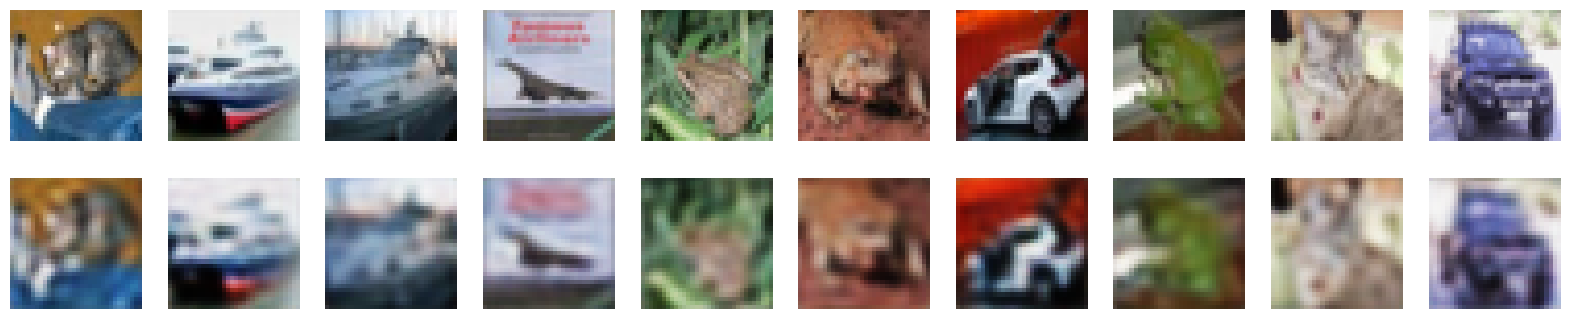

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

# Normalize the data to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape data for the model
input_shape = x_train.shape[1:]  # (32, 32, 3)

# Define the autoencoder
# Encoder
input_layer = layers.Input(shape=input_shape)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
latent = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(latent)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
output_layer = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Build the model
autoencoder = models.Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=2,
                          batch_size=64,
                          validation_data=(x_test, x_test),
                          verbose=1)

# Predict and reconstruct test images
reconstructed = autoencoder.predict(x_test)

# Plot original and reconstructed images
def plot_images(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original images
        plt.subplot(2, n, i + 1)
        plt.imshow(original[i])
        plt.axis('off')
        
        # Reconstructed images
        plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i])
        plt.axis('off')
    plt.show()

# Plot 10 original and reconstructed images
plot_images(x_test, reconstructed, n=10)
